In [13]:
#hide earrings 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
#from lifelines.plotting import lifetimes

In [14]:
from lifelines import KaplanMeierFitter

In [144]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
def get_convert_dtype(list_of_c_ids):
    for list_of_c_id in list_of_c_ids:
        df[list_of_c_id] = pd.to_numeric(df[list_of_c_id],errors='coerce')
get_convert_dtype(["TotalCharges"])

In [66]:
ob = []
integer = []
fl = []
list_df = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in list_df:
    if df[i].dtypes == 'object':
        ob.append(i)
    if df[i].dtypes == 'int64':
        integer.append(i)
    if  df[i].dtypes == 'float64':
        fl.append(i)

In [86]:
print(fl,'\n\n',ob,'\n\n',integer)

['MonthlyCharges', 'TotalCharges'] 

 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

 ['SeniorCitizen', 'tenure']


In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [57]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [70]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )
df

In [75]:
df['TotalCharges'].median()

1397.475

In [82]:
df.fillna(df['TotalCharges'].median(),inplace=True)

In [89]:
cat_col = [i for i in df.columns if df[i].dtype == object]
cat_col.remove('customerID')#it is remove b/c it is unique for all row

In [91]:
for i in cat_col:
    print('Column Name',i)
    print(df[i].value_counts())
    print('----------------------')

Column Name gender
Male      3555
Female    3488
Name: gender, dtype: int64
----------------------
Column Name Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
----------------------
Column Name Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
----------------------
Column Name PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
----------------------
Column Name MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------------------
Column Name InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----------------------
Column Name OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
----------------------
Column Name OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBacku

<AxesSubplot:xlabel='timeline'>

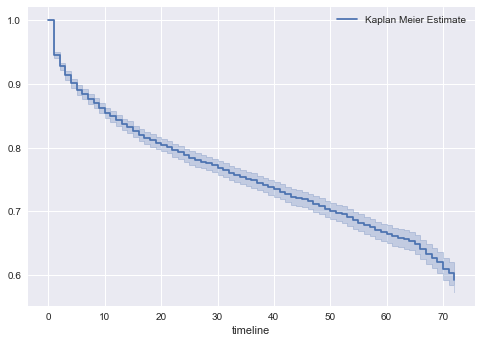

In [99]:
duration = df['tenure']#time to event date of censored and event date
events = df['Churn']# churn is 1 and (cen-sored)(past time) is 0
knf = KaplanMeierFitter()#knf is the object of KaplanMeierFitter
knf.fit(duration,events,label='Kaplan Meier Estimate')#fit the data into model 
knf.plot()#it create the estimate

<AxesSubplot:xlabel='timeline'>

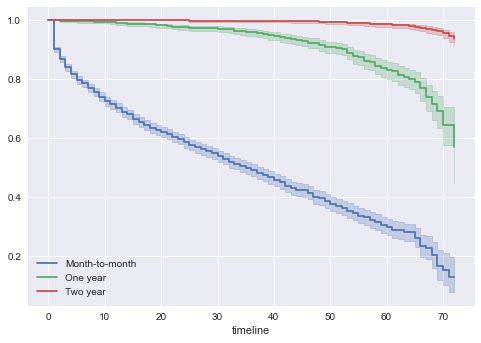

In [112]:
T = df['tenure']#(tenure is period of time) time to event 
E = df['Churn']#event occurs or censored
group = df['Contract']#create the cohort(group of things and people have same charactistics) from the contract column 
ix1 = (group == 'Month-to-month')#cohort1
ix2 = (group == 'One year')#cohort2
ix3 = (group == 'Two year')#cohort3
knf.fit(T[ix1],E[ix1],label='Month-to-month')#fit cohort1 data
ax = knf.plot()
knf.fit(T[ix2],E[ix2],label='One year')#fit cohort2 data
ax1 = knf.plot(ax=ax)
knf.fit(T[ix3],E[ix3],label='Two year')#fit cohort3 data
knf.plot(ax=ax1)#plot KN curve on same x and y axis 

<AxesSubplot:xlabel='timeline'>

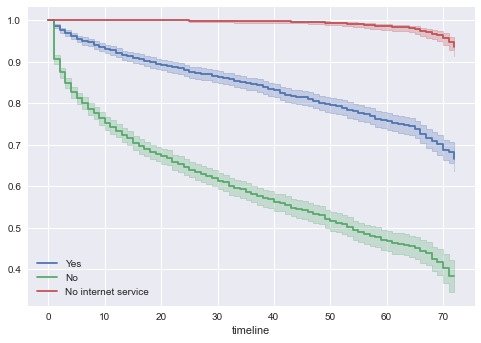

In [114]:
T = df['tenure']#(tenure is period of time) time to event 
E = df['Churn']#event occurs or censored
group = df['DeviceProtection']#create the cohort(group of things and people have same charactistics) from the contract column 
ix1 = (group == 'Yes')#cohort1
ix2 = (group == 'No')#cohort2
knf.fit(T[ix1],E[ix1],label='Yes')#fit cohort1 data
ax = knf.plot()
knf.fit(T[ix2],E[ix2],label='No')#fit cohort2 data
ax1 = knf.plot(ax=ax)
knf.fit(T[ix3],E[ix3],label='No internet service')#fit cohort3 data
knf.plot(ax=ax1)#plot KN curve on same x and y axis 

<AxesSubplot:xlabel='timeline'>

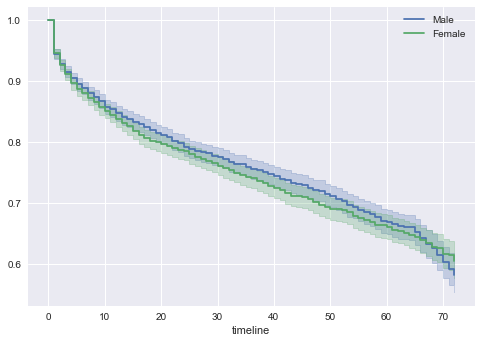

In [140]:
T = df['tenure']#(tenure is period of time) time to event 
E = df['Churn']#event occurs or censored
group = df['gender']#create the cohort(group of things and people have same charactistics) from the contract column 
ix1 = (group == 'Male')#cohort1
ix2 = (group == 'Female')#cohort2
knf.fit(T[ix1],E[ix1],label='Male')#fit cohort1 data
ax = knf.plot()
knf.fit(T[ix2],E[ix2],label='Female')#fit cohort2 data
knf.plot(ax=ax)

In [101]:
xi1

[0        True
 1       False
 2        True
 3       False
 4        True
         ...  
 7038    False
 7039    False
 7040     True
 7041     True
 7042    False
 Name: Contract, Length: 7043, dtype: bool]

# Cox proportional Hazard model (survival regression)

In [115]:
from lifelines import CoxPHFitter

In [120]:
df_r = df.loc[:,['tenure','Churn','gender', 'Partner', 'Dependents','PhoneService','MonthlyCharges', 'SeniorCitizen','StreamingTV'] 
]# it is subset of dataset frame to train the model 
df_r.head()

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [123]:
df_dummy = pd.get_dummies(df_r,drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In [143]:
cph = CoxPHFitter()
cph.fit(df_dummy,'tenure',event_col='Churn')#tenure is time ,and churn is label
cph.print_summary()#it is desh board 

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15182.39
         time fit was run = 2022-10-19 17:45:35 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
MonthlyCharges                   -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
SeniorCitizen                     0.40       1.49       0.06             0.29             0.50                 1.33                 1.66
gender_Male                      -0.01       0.99       0.05            -0.10             0.08                 0.90                 1.08
Partner_Yes                      -0.81       0.45       0.05            -0.92            -0.70                 0.40                 0.50
Dependents_Yes                   -0.36       0.70       0.07            -0.49            -0.22                 0.61                 0.80
PhoneService_Yes                  0.69       2.00       0.10             0.49             0.90                 1.63                 2.45
StreamingTV_No internet service  -2.10       0.12       0.13            -2.36            -1.84                 0.09                 0.16
StreamingTV_Yes                  -0.19       0.83       0.06            -0.31            -0.07                 0.73                 0.93

                                  cmp to      z      p   -log2(p)
covariate                                                        
MonthlyCharges                      0.00  -6.13 <0.005      30.06
SeniorCitizen                       0.00   7.16 <0.005      40.15
gender_Male                         0.00  -0.23   0.82       0.29
Partner_Yes                         0.00 -14.93 <0.005     164.98
Dependents_Yes                      0.00  -5.21 <0.005      22.37
PhoneService_Yes                    0.00   6.65 <0.005      34.96
StreamingTV_No internet service     0.00 -15.79 <0.005     184.09
StreamingTV_Yes                     0.00  -3.10 <0.005       9.03
---
Concordance = 0.71
Partial AIC = 30380.78
log-likelihood ratio test = 941.30 on 8 df
-log2(p) of ll-ratio test = 654.95

In [133]:
dir(cph)# these are the method which associate with cph

['AIC_',
 'AIC_partial_',
 '_ALLOWED_RESIDUALS',
 '_FAST_MEDIAN_PREDICT',
 '_KNOWN_MODEL',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_mode',
 '_censoring_type',
 '_central_values',
 '_check_values_post_fitting',
 '_check_values_pre_fitting',
 '_choose_gradient_calculator',
 '_class_name',
 '_clusters',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_central_values_of_raw_training_data',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_deviance',
 '_compute_martingale',
 '_compute_p_values',
 '_compute_sandwich_estimator',
 '_

In [135]:
tr_rows = df_dummy.iloc[5:10,2:]
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,0,0,0,1,0,1
6,89.10,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0
8,104.80,0,0,1,0,1,0,1
9,56.15,0,1,0,1,1,0,0


<AxesSubplot:>

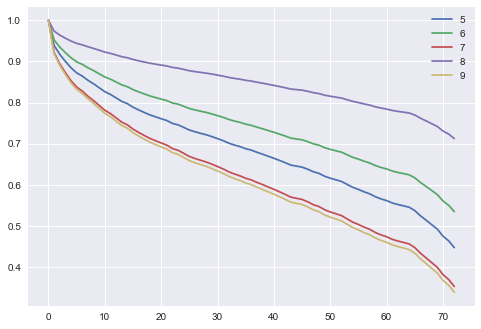

In [137]:
cph.predict_survival_function(tr_rows).plot()

<AxesSubplot:xlabel='log(HR) (95% CI)'>

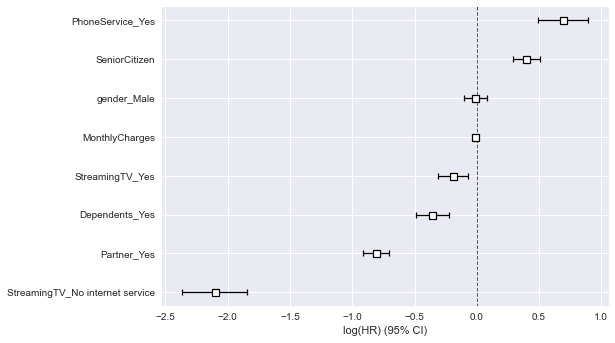

In [130]:
cph.plot()# in plot the figures in big size are important and small are less important and so on 

In [97]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
